In [1]:
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

In [2]:
def display_cover(top,bottom ):
    """This function
    """
    import requests
    
    name='album_art_raw.png'
    # Now let's get an album cover.
    # https://picsum.photos/ is a free service that offers random images.
    # Let's get a random image:
    album_art_raw = requests.get('https://picsum.photos/500/500/?random')
    # and save it as 'album_art_raw.png'
    with open(name,'wb') as album_art_raw_file:
       album_art_raw_file.write(album_art_raw.content)
    # Now that we have our raw image, let's open it 
    # and write our band and album name on it
    img = Image.open("album_art_raw.png")
    draw = ImageDraw.Draw(img)

    # We'll choose a font for our band and album title
    band_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 25) #25pt font
    album_name_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20) # 20pt font

    # the x,y coordinates for where our album name and band name text will start
    # counted from the top left of the picture (in pixels)
    band_x, band_y = 50, 50
    album_x, album_y = 50, 400

    # Our text should be visible on any image. A good way
    # of accomplishing that is to use white text with a 
    # black border. We'll use the technique shown here to draw the border:
    # https://mail.python.org/pipermail/image-sig/2009-May/005681.html
    outline_color ="black"

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255),font=band_name_font)
    draw.text((album_x, album_y),bottom,(255,255,255),font=album_name_font)

    return img

In [3]:
img=display_cover(top='Python',bottom='Data Science')

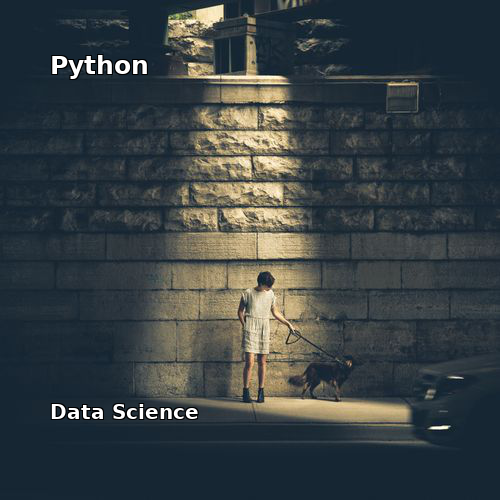

In [4]:
img.save('sample-out.png')
IPythonImage(filename='sample-out.png')

In [5]:
import requests

In [6]:
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'

In [7]:
# Download the Wikipedia page

raw_random_wikipedia_page = requests.get(wikipedia_link)

In [8]:
# Convert the Wikipedia page to a string

page = str(raw_random_wikipedia_page.text)
print(page)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Jochen Sachse - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Jochen_Sachse","wgTitle":"Jochen Sachse","wgCurRevisionId":863521091,"wgRevisionId":863521091,"wgArticleId":8116789,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from October 2018","All stub articles","1948 births","Living people","People from Frankenberg, Saxony","German male hammer throwers","East German male hammer throwers","Olympic athletes of East Germany","Olympic silver medalists for East Germany","Athletes (track and field) at the 1972 Summer Olympics","Athletes

In [9]:
# Part 1 - Find Wikipedia article title to use as title of band
start_of_title = page.find('<title>')
end_of_title = page.find('</title>')

# Part 2 - Remove term "- Wikipedia" from article title; assign result to band_title
article_title = page[start_of_title+7:end_of_title]
band_title = article_title.replace(' - Wikipedia','')
print(band_title)

Jochen Sachse


In [10]:
raw_random_wikipedia_page = requests.get(wikipedia_link)
page = raw_random_wikipedia_page.text
print(page)

start_of_title = page.find('<title>')
end_of_title = page.find('</title>')
article_title = page[start_of_title+7:end_of_title]
album_title = article_title.replace(' - Wikipedia','')
print(album_title)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Cantellated 5-cubes - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Cantellated_5-cubes","wgTitle":"Cantellated 5-cubes","wgCurRevisionId":783146000,"wgRevisionId":783146000,"wgArticleId":31626652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["5-polytopes"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","Novembe

In [11]:
print("Your band: ", band_title)
print("Your album: ", album_title)

Your band:  Jochen Sachse
Your album:  Cantellated 5-cubes


In [12]:
img=display_cover(top=band_title,bottom=album_title)

In [13]:
img.save('sample-out.png')

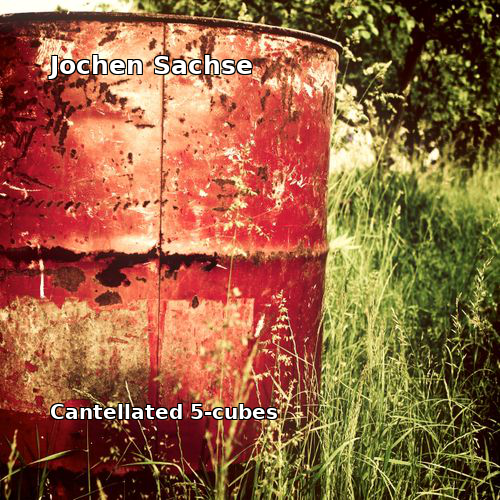

In [14]:
IPythonImage(filename='sample-out.png')